

# Project: Investigate a Dataset - [No-Show Appoiments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset that we are going to invistigate is a list of patients of a hospital in brazil! it contains data of patients who whether show up to their appointments or not, with other informtation about the patient.
    


### Question(s) for Analysis
-How likely a person be absent for an appointment?

-do recieving an SMS have an affect on attending?

-do having a scholarship affect on attending?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade --force-reinstall pandas

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
#loading the data
df= pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#First we inspect the data with general operations; the data size.
df.shape

(110527, 14)

In [5]:
#checking if there's is any null values.
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

looks like we don't have any null values what about duplicates?

In [6]:
#it looks like we don't have any null values on each of the columns, what about duplicates?
df.duplicated().sum()

0

Great, we do not have any values that might affect our analysis.


### Data Cleaning

In [7]:
# let's rename a column because of a spelling mistake; so if other users don't get confused. and appointment day to date
df.rename(columns={'Handcap':'Handicap','AppointmentDay':'AppointmentDate' }, inplace=True)
                  
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# turn any dates to datetime so it can be easier to make comparisions etc..
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId          110527 non-null float64
AppointmentID      110527 non-null int64
Gender             110527 non-null object
ScheduledDay       110527 non-null datetime64[ns]
AppointmentDate    110527 non-null datetime64[ns]
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null int64
Hipertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null int64
No-show            110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [9]:
#turning SMS values to True and False
df['SMS_received'] = df['SMS_received'].astype(bool)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,False,No


In [10]:
#trimming the outlier of 'age' column
def trim_outliers(df, column, lower_percentile, upper_percentile):
    column_values = df[column].values
    lower_bound = np.percentile(column_values, lower_percentile)
    upper_bound = np.percentile(column_values, upper_percentile)
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df
df = trim_outliers(df, "Age", 5, 95)

In [11]:
#making no show valus to 1 and 0 to make it easier to plot later.
df['No-show'] = df['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (How likely a person be absent for an appointment?)

Deciding to plot one variable would be great on a pie chart.

In [12]:
#Seperate the dataframe into two dataframes.
absent = df[df['No-show']== 1]
present = df[df['No-show']== 0]


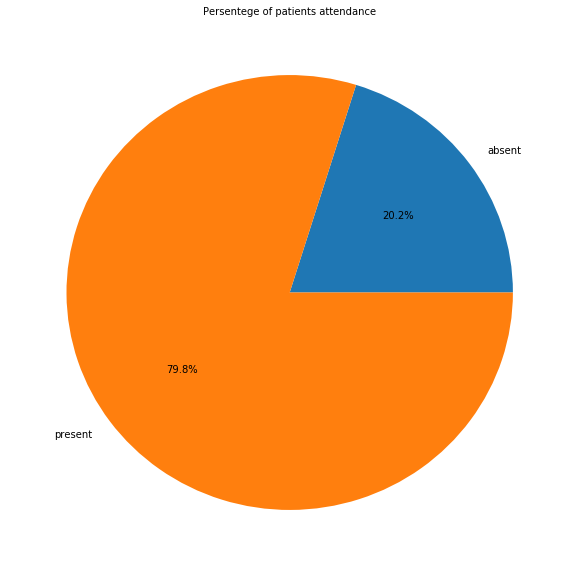

In [13]:
plt.figure(figsize=(10,10))
plt.pie([absent.shape[0],present.shape[0]] , labels=['absent','present'] , autopct='%1.1f%%')
plt.title('Persentege of patients attendance' , fontsize=10)
plt.show();

### It appears that the majority of the patients do attend,but the other percentage is considered to be high (20.2%).

### Research Question 2  (do recieving an SMS have an affect on attending?)

let's look deeper on paatients who did not attend, how much that were absent and did or did not recieve an SMS.

In [14]:
#separating the data of not attending with variable SMS(recieved or not)
absent_F=absent.query('SMS_received == False')
absent_T=absent.query('SMS_received == True')
absent_F.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDate,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23.0,GOIABEIRAS,0,0,0,0,0,False,1


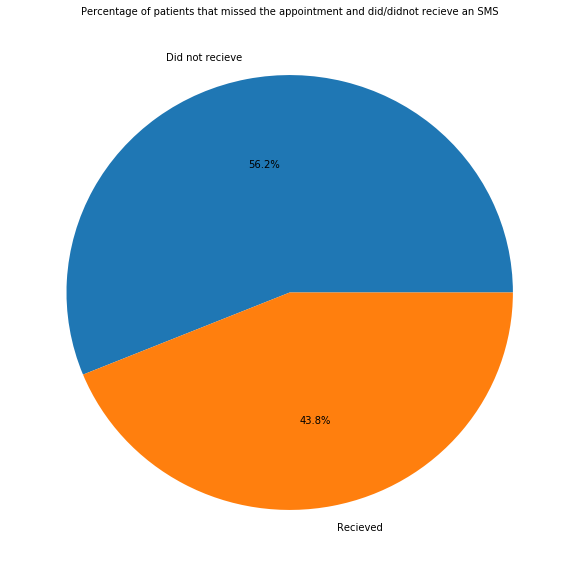

In [15]:
plt.figure(figsize=(10,10))
plt.pie([absent_F.shape[0],absent_T.shape[0]] , labels=['Did not recieve','Recieved'] , autopct='%1.1f%%')
plt.title('Percentage of patients that missed the appointment and did/didnot recieve an SMS', fontsize=10)
plt.show();

looks like the patients who didn't recieve an SMS is a bit higher of a percentage.

### Research Question 3  (do having a scholarship affect on attending?)

In [16]:
df_S = df.groupby(['Scholarship','Gender'])['No-show'].mean()
df_S 

Scholarship  Gender
0            F         0.198263
             M         0.197743
1            F         0.237885
             M         0.235060
Name: No-show, dtype: float64

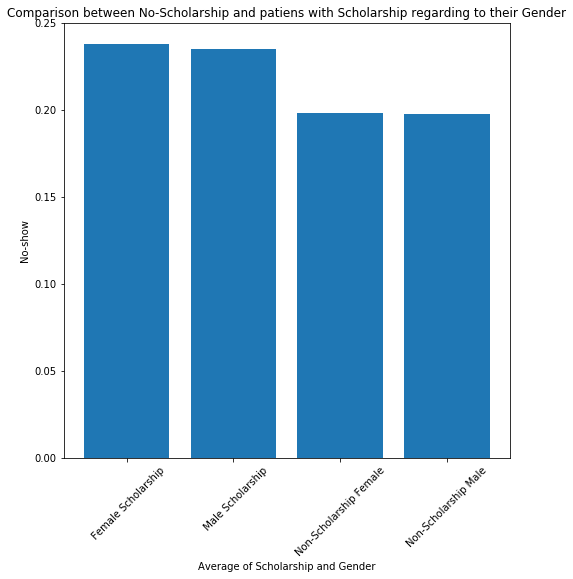

In [17]:
# a bar chart that visualise the comparison between No-Show and the Alcoholic patiens regarding to their gender .
categories = ['Non-Scholarship Female','Non-Scholarship Male','  Female Scholarship','  Male Scholarship']
def barPlot(df):
    plt.subplots(figsize=(8,8))
    plt.bar(categories,df)
    plt.title('Comparison between No-Scholarship and patiens with Scholarship regarding to their Gender')
    plt.xlabel('Average of Scholarship and Gender')
    plt.ylabel('No-show');
    plt.xticks(rotation=45)
barPlot(df_S)

it looks like having a scholarship do have a good impact factor on attending, with a slight edge over for the males.

### Research Question 4  (is there a relation between age of people not showing?)

lets see if we can visualize a relation between attending and age.

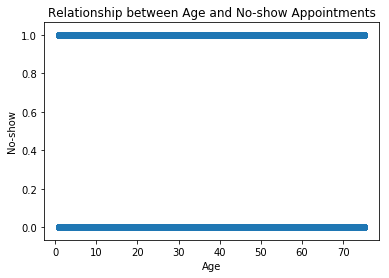

In [18]:
#creating a scatter plot between age and no show.
plt.scatter(df['Age'], df['No-show'])
plt.xlabel('Age')
plt.ylabel('No-show')
plt.title('Relationship between Age and No-show Appointments')
plt.show()

###it appears that there's no relation ship between the two, let's use a different plot.

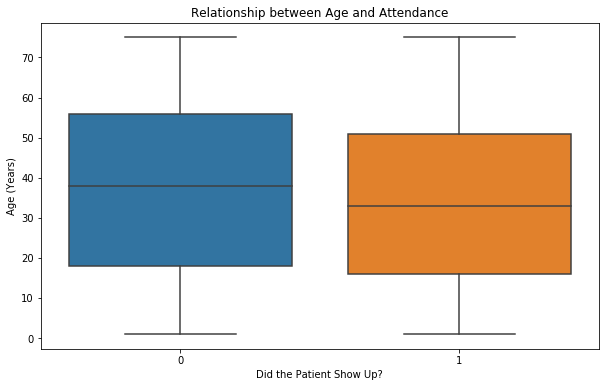

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x="No-show", y="Age", data=df)
plt.xlabel("Did the Patient Show Up?")
plt.ylabel("Age (Years)")
plt.title("Relationship between Age and Attendance")
plt.show()

###it apperas that the age median of the people who did not show is slightly higher. (look for the conclusion for reasoning

<a id='conclusions'></a>
## Conclusions

Finally in this report we conclude regarding to our questions, most of the patients attend their appointments with 20.2% who are absent.Also, when we went a bit deeper on why patients who didn't attend their appointments, we found that a higher percentage of them didn't recieve an SMS message (16.2%). And lastly, do male and female with scholarships have a higher attending rate; it showed at the bar plot that it seemed to have a good impact factor on attending the appointment, and it looks like we can't draw a relation between age and not showing since "no-show' is just a binary value.

The limitations of this report was on the wrangling part where i had to change some columns values so it can be used in calculations and the hospital location so it might then be correctly compared with it's Neighbourhoods.


In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0